In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [139]:
df = pd.read_csv('iris.csv',names=['SepalLengthcm','SepalWidthcm','PetalLengthcm','PetalWidthcm','Species'])

df.tail(5)

,SepalLengthcm,SepalWidthcm,PetalLengthcm,PetalWidthcm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [140]:
# extract sepal length and sepal width of setosa and versicolor for our binary calssification problem
X = df.iloc[:, 0:4].values

y = df.iloc[:, 4].values
# set output lable value to 1 if it is setosa and 0 if versicolor.
y = np.where(y == 'Iris-setosa', 1, 0)
#print(X[:,0])

In [141]:
# features standerdization
X_std = np.copy(X)

X_std[:,0] = (X_std[:,0] - X_std[:,0].mean()) / X_std[:,0].std()
X_std[:,1] = (X_std[:,1] - X_std[:,1].mean()) / X_std[:,1].std()
X_std[:,2] = (X_std[:,2] - X_std[:,2].mean()) / X_std[:,2].std()
X_std[:,3] = (X_std[:,3] - X_std[:,3].mean()) / X_std[:,3].std()
#print(X_std)

In [142]:
# Define Logistic Regression hypothesis or sigmoid function
def sigmoid(value):
    return 1.0 / ( 1.0 + np.exp(-value))

In [143]:
# Define Logistic Regression Cost Function
def RSS(X, y, betas):
    j=0
    predicted_value=betas[0] + np.dot(X_std[:,0], betas[1]) + np.dot(X_std[:,1], betas[2]) + np.dot(X_std[:,2], betas[3]) + np.dot(X_std[:,3], betas[4])
    #y = y[i]
    hx=sigmoid(predicted_value)
    # compute cost for given theta parameters
    j = -y.dot(np.log(hx)) - ((1 - y).dot(np.log(1-hx)))
    #rss = rss + ((-actual_value*np.log(pred_value)) - ((1-actual_value)*np.log(1-pred_value))) 
    return (j/X.shape[0])

In [144]:
def predicted_value_for_ithRow(X,i,betas):
    return (1/(1.0 + np.exp(-(betas[0] + np.dot(X_std[:,0], betas[1]) + np.dot(X_std[:,1], betas[2]) + np.dot(X_std[:,2], betas[3]) + np.dot(X_std[:,3], betas[4])))))

In [145]:
def gradientDescentAlgorithm(x, y, learning_rate):
    
    print ("Training Linear Regression Model using Gradient Descent")
    
    maximum_iterations = 5000
    converge_status = False
    
    # num_rows stores the number of datapoints in the current dataset provided for training.
    num_rows = x[0].shape[0]

    # Initial Value of parameters ((beta_0, beta_1) - for our simple linear regression case)
    betas = [0,0,0,0,0]

    # Initial Error or RSS(beta_0,beta_1) based on the initial parameter values
    error = RSS(x, y, betas)
    print('Initial Value of RSS (Cost Function)=', error);
    
    # Iterate Loop
    num_iter = 0
    while not converge_status:
        # for each training sample, compute the gradient (d/d_beta j(beta))
        gradient_0 = 1.0/num_rows * sum([(predicted_value_for_ithRow(x,i,betas) - y[i]) for i in range(num_rows)]) 
        gradient_1 = 1.0/num_rows * sum([(predicted_value_for_ithRow(x,i,betas) - y[i])*x[0][i] for i in range(num_rows)])
        gradient_2 = 1.0/num_rows * sum([(predicted_value_for_ithRow(x,i,betas) - y[i])*x[1][i] for i in range(num_rows)])
        gradient_3 = 1.0/num_rows * sum([(predicted_value_for_ithRow(x,i,betas) - y[i])*x[2][i] for i in range(num_rows)])
        gradient_4 = 1.0/num_rows * sum([(predicted_value_for_ithRow(x,i,betas) - y[i])*x[3][i] for i in range(num_rows)])
        
        # Computation of new parameters according to the current gradient.
        temp0 = betas[0] - learning_rate * gradient_0
        temp1 = betas[1] - learning_rate * gradient_1
        temp2 = betas[2] - learning_rate * gradient_2
        temp3 = betas[3] - learning_rate * gradient_3
        temp4 = betas[4] - learning_rate * gradient_4
        
    
        # Simultaneous Update of Parameters Beta_0 and Beta_1.
        betas[0] = temp0
        betas[1] = temp1
        betas[2] = temp2
        betas[3] = temp3
        betas[4] = temp4
               
        current_error = RSS(x, y, betas)
        
        if num_iter % 250 == 0:
            print ('Iteration',num_iter+1,'Current Value of RSS (Cost Function) based on updated values of beta parameters = ', current_error)
            
        error = current_error   # update error 
        num_iter = num_iter + 1  # update iter
    
        if num_iter == maximum_iterations:
            print ("Training Interrupted as Maximum number of iterations were crossed.\n\n")
            converge_status = True

    return (betas)

In [146]:
# m = Number of training examples
# n = number of features
3#, n = X.shape

# initialize theta(weights) parameters to zeros
#theta = np.zeros(1+n)
#print(theta)

# set learning rate to 0.01 and number of iterations to 500
#alpha = 0.01
#num_iter = 5000

coefficients = gradientDescentAlgorithm(X_std,y,0.0000000005)

Training Linear Regression Model using Gradient Descent
('Initial Value of RSS (Cost Function)=', 0.6931471805599453)
('Iteration', 1, 'Current Value of RSS (Cost Function) based on updated values of beta parameters = ', 0.6931471806016118)
('Iteration', 251, 'Current Value of RSS (Cost Function) based on updated values of beta parameters = ', 0.6931471910182788)
('Iteration', 501, 'Current Value of RSS (Cost Function) based on updated values of beta parameters = ', 0.6931472014349463)
('Iteration', 751, 'Current Value of RSS (Cost Function) based on updated values of beta parameters = ', 0.6931472118516151)
('Iteration', 1001, 'Current Value of RSS (Cost Function) based on updated values of beta parameters = ', 0.693147222268284)
('Iteration', 1251, 'Current Value of RSS (Cost Function) based on updated values of beta parameters = ', 0.6931472326849532)
('Iteration', 1501, 'Current Value of RSS (Cost Function) based on updated values of beta parameters = ', 0.6931472431016239)
('Itera

In [147]:
# m = Number of training examples
# n = number of features
m, n = X.shape

# initialize theta(weights) parameters to zeros
betas = np.zeros(1+n)
#print(theta)

# set learning rate to 0.01 and number of iterations to 500
learning_rate = 0.0000000001
num_iter = 5000
cost = gradientDescentAlgorithm(X_std,y,learning_rate)

Training Linear Regression Model using Gradient Descent
('Initial Value of RSS (Cost Function)=', 0.6931471805599453)
('Iteration', 1, 'Current Value of RSS (Cost Function) based on updated values of beta parameters = ', 0.6931471805682785)
('Iteration', 251, 'Current Value of RSS (Cost Function) based on updated values of beta parameters = ', 0.6931471826516122)
('Iteration', 501, 'Current Value of RSS (Cost Function) based on updated values of beta parameters = ', 0.6931471847349451)
('Iteration', 751, 'Current Value of RSS (Cost Function) based on updated values of beta parameters = ', 0.6931471868182787)
('Iteration', 1001, 'Current Value of RSS (Cost Function) based on updated values of beta parameters = ', 0.6931471889016123)
('Iteration', 1251, 'Current Value of RSS (Cost Function) based on updated values of beta parameters = ', 0.6931471909849454)
('Iteration', 1501, 'Current Value of RSS (Cost Function) based on updated values of beta parameters = ', 0.6931471930682792)
('Iter

Text(0.5,1,'Logistic Regression')

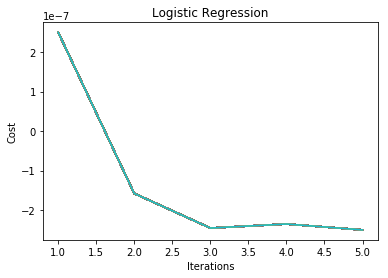

In [148]:
# Make a plot with number of iterations on the x-axis and the cost function on y-axis
plt.plot(range(1, len(cost) + 1), cost)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Logistic Regression')